In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_wine

import warnings
warnings.filterwarnings('ignore')


In [71]:
# Load the dataset
wine = load_wine()
x = wine.data
y = wine.target.reshape(-1, 1)

In [72]:
# DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add the target column
df['target'] = wine.target

# Print the head of the dataset
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [73]:
df.shape # no. of rows and no. columns

(178, 14)

In [74]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool>

In [75]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [76]:
# Normalization 
scaler = StandardScaler()
x = scaler.fit_transform(x)

# one-hot encoding
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)


In [77]:
# training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [78]:
model = Sequential([
    Dense(10, input_shape=(13,), activation='relu'),  
    Dense(3, activation='softmax') 
])
# Hidden layer-10 neurons and ReLU is using activation
 # Output layer- 3, softmax activation


In [79]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [84]:
history = model.fit(x_train, y_train, epochs=10, batch_size=5, validation_split=0.2)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9139 - loss: 0.3851 - val_accuracy: 0.9310 - val_loss: 0.3309
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9442 - loss: 0.3777 - val_accuracy: 0.9310 - val_loss: 0.3003
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9153 - loss: 0.3517 - val_accuracy: 0.9310 - val_loss: 0.2764
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9290 - loss: 0.2850 - val_accuracy: 0.9310 - val_loss: 0.2568
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9266 - loss: 0.2736 - val_accuracy: 0.9310 - val_loss: 0.2367
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9685 - loss: 0.2379 - val_accuracy: 0.9310 - val_loss: 0.2216
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9813 - loss: 0.2100 - val_accuracy: 0.9310 - val_loss: 0.2069
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9567 - loss: 0.2077 - val_accuracy: 0.9310 - val_loss

In [85]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n accuracy:', test_acc)


2/2 - 0s - 31ms/step - accuracy: 1.0000 - loss: 0.0947

 accuracy: 1.0


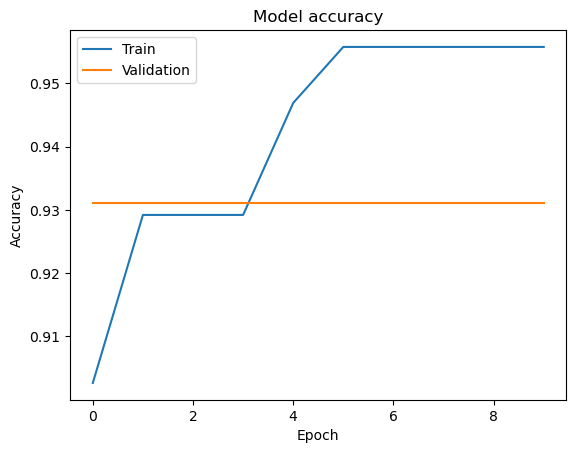

In [87]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



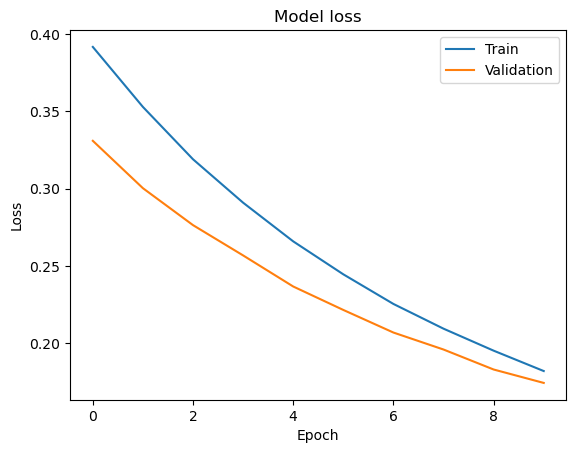

In [89]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()